#Inspect Raw Netcdf

*******************************
Playing around with efficient ways to merge and view netcdf data from the tower. This ipython notebook depends on the python script of the same name.

In [8]:
usr = 'Julia'
FILEDIR = 'C:/Users/%s/Dropbox (PE)/KenyaLab/Data/Tower/TowerData/'%usr
NETCDFLOC = FILEDIR + 'raw_netcdf_output/'
DATALOC = 'F:/towerdata/'

###Using the xray dataset directly (only works for Table1)

In [1]:
import datetime as dt
from inspect_raw_netcdf import *
import matplotlib.pyplot as plt
%matplotlib inline

Which datafile do you want to look at (choose from list and use exact spelling)? 
lws, licor, WVIA, ts_data, flux, upper, Manifold, Table1, Table1Rain
Table1
If you don't want the full dataset, enter date range in format YYYY-MM-DD
start: 2012-01-13
end: 2012-01-15
Which of the following types of data would you like to explore?: 
VW,PA,Tsoil,shfTsoil


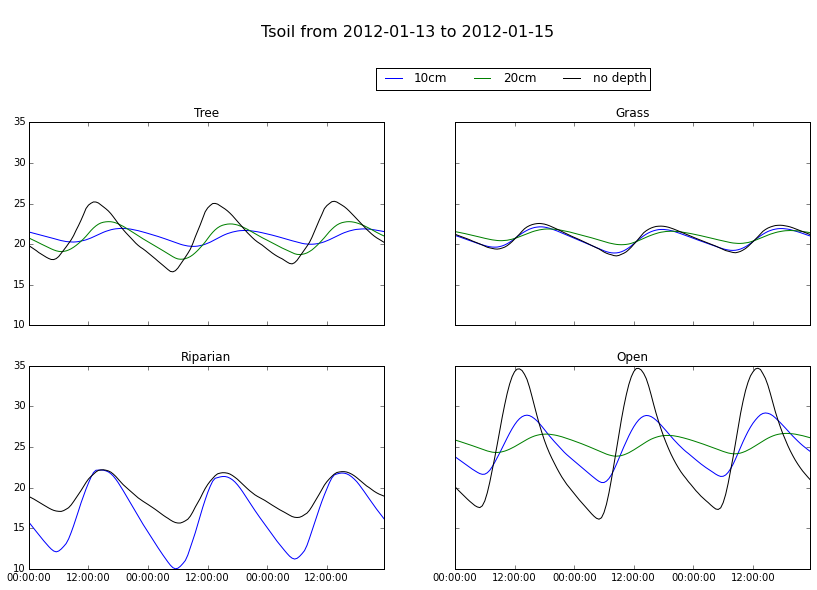

In [6]:
ds, start, end = process(NETCDFLOC)
L, places, ps, depths, colors, data_options = clean_Table1(ds)
data, data_list = pick_type(L, data_options)
fig = make_plots(FILEDIR,ds,start,end,places,ps,depths,colors,data,data_list)

##Using a pandas dataframe with xray

In [43]:
from __future__ import print_function
import pandas as pd
import datetime as dt
import xray


In [44]:
def one_week(input_dir):
    datas = ['lws','licor','Table1','Table1_rain']
    #start = dt.datetime.utcnow()-dt.timedelta(7)
    start = dt.datetime(2014,01,1)
    end = dt.datetime(2014,01,10)
    for data in datas:
        try: 
            ds,df,params = inspect_raw(input_dir,data,start,end)
        except: 
            print('\nThere doesn\'t seem to be any %s data for this interval'%data)
    return ds,df,params

In [6]:
def inspect_raw(input_dir,data,start,end):
    ds = grabDateRange(input_dir,data,start,end)
    df = ds.to_dataframe().dropna(axis=1,how='all')
    non_null = set(df.columns)
    params = set(ds.vars)
    null_params = list(params - non_null)
    null_params.sort()
    print('\n%s data ranges from:\n'%data,
          ds.coords['time'].values[0], 'to\n',
          ds.coords['time'].values[-1], 
          '\n and contains null values for:' )
    for p in null_params:
        print('         ', p) 
    return ds,df,params